In [17]:
import yfinance as yf
import pandas as pd

In [18]:
nifty50 = yf.Ticker('^NSEI')
nifty50 = nifty50.history(start='2014-01-01', end='2024-10-15')
nifty50
#the volume here is (The actual volume / 1000)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-02 00:00:00+05:30,6301.250000,6358.299805,6211.299805,6221.149902,158100,0.0,0.0
2014-01-03 00:00:00+05:30,6194.549805,6221.700195,6171.250000,6211.149902,139000,0.0,0.0
2014-01-06 00:00:00+05:30,6220.850098,6224.700195,6170.250000,6191.450195,118300,0.0,0.0
2014-01-07 00:00:00+05:30,6203.899902,6221.500000,6144.750000,6162.250000,138600,0.0,0.0
2014-01-08 00:00:00+05:30,6178.049805,6192.100098,6160.350098,6174.600098,146900,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-08 00:00:00+05:30,24832.199219,25044.000000,24756.800781,25013.150391,333200,0.0,0.0
2024-10-09 00:00:00+05:30,25065.800781,25234.050781,24947.699219,24981.949219,290600,0.0,0.0
2024-10-10 00:00:00+05:30,25067.050781,25134.050781,24979.400391,24998.449219,261400,0.0,0.0


In [19]:
nifty50.index

DatetimeIndex(['2014-01-02 00:00:00+05:30', '2014-01-03 00:00:00+05:30',
               '2014-01-06 00:00:00+05:30', '2014-01-07 00:00:00+05:30',
               '2014-01-08 00:00:00+05:30', '2014-01-09 00:00:00+05:30',
               '2014-01-10 00:00:00+05:30', '2014-01-13 00:00:00+05:30',
               '2014-01-14 00:00:00+05:30', '2014-01-15 00:00:00+05:30',
               ...
               '2024-09-30 00:00:00+05:30', '2024-10-01 00:00:00+05:30',
               '2024-10-03 00:00:00+05:30', '2024-10-04 00:00:00+05:30',
               '2024-10-07 00:00:00+05:30', '2024-10-08 00:00:00+05:30',
               '2024-10-09 00:00:00+05:30', '2024-10-10 00:00:00+05:30',
               '2024-10-11 00:00:00+05:30', '2024-10-14 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=2646, freq=None)

<Axes: xlabel='Date'>

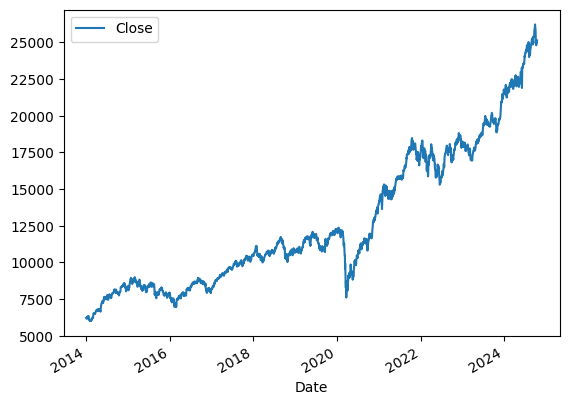

In [20]:
nifty50.plot.line(y='Close', use_index='True')

In [21]:
del nifty50["Dividends"]
del nifty50["Stock Splits"]

In [22]:
nifty50["Tommorow"] = nifty50['Close'].shift(-1)

In [47]:
nifty50['Target'] = (nifty50['Tommorow'] > nifty50['Close']).astype(int)

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = nifty50.iloc[:-100]
test = nifty50.iloc[-100:]
Predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[Predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [49]:
from sklearn.metrics import precision_score
preds = pd.Series(model.predict(test[Predictors]))

In [51]:
precision_score(test['Target'], preds)

1.0

In [52]:
import joblib
joblib.dump(model, 'stockpred.pkl')


['stockpred.pkl']